<a href="https://colab.research.google.com/github/tanyachaudhary345/Titanic-Survival-Prediction/blob/main/titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
os.listdir('/content/drive/MyDrive')


['about:blank.pdf',
 'IMG_20221218_224811.pdf',
 'ConfirmationPage-230310104266.pdf',
 'DOC-20221218-WA0019..pdf',
 'AdmitCard-230310104266 (1).pdf',
 'aadhar card7.pdf',
 '51823898_Consultant_Application.pdf',
 '2023163794 (1).pdf',
 '2023163794.pdf',
 '1684306478973.jpg',
 'IMG_20230518_202018.pdf',
 'IMG_20230518_201539.pdf',
 'IMG_20230518_202000.pdf',
 '20230519_111008_0000 (1).pdf',
 '20230519_210621_0000.pdf',
 '20230520_173009_0000.pdf',
 '1_20230521_195942_0000.png',
 '2_20230521_195942_0001.png',
 '1_20230521_195942_0000.pdf',
 '20230522_135211_0000.pdf',
 'IMG_20230522_173042.pdf',
 'photo.jpg',
 'Copy of My work',
 'png_20230523_110223_0000.png',
 'IMG_20230522_174043.jpg',
 '20230522_135211_0000.png',
 'IMG_20230520_180140.jpg',
 'IMG_20230520_173323.jpg',
 '20230520_102355_0000.png',
 '1693381561979.png',
 '20230908_151055_0000.png',
 'IMG_20230908_150715.png',
 '1694166192147.png',
 '1694166192156.png',
 'FEAR NO MAN.pdf',
 'copy slice.pdf',
 'MY WORKS.pdf',
 'WhatsApp I

In [3]:
os.listdir('/content/drive/MyDrive/titanic')


['gender_submission.csv', 'train.csv', 'test.csv']

In [4]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/titanic/train.csv')
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape
train.info()
train.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
train.drop('Cabin', axis=1, inplace=True)


/tmp/ipython-input-4269470413.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
/tmp/ipython-input-4269470413.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [7]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)


In [8]:
X = train[['Pclass', 'Sex', 'Age', 'Fare']]
y = train['Survived']


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [11]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)


0.8044692737430168

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[90 15]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



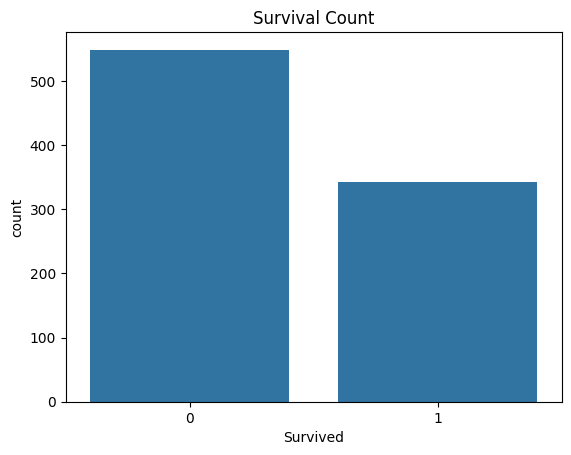

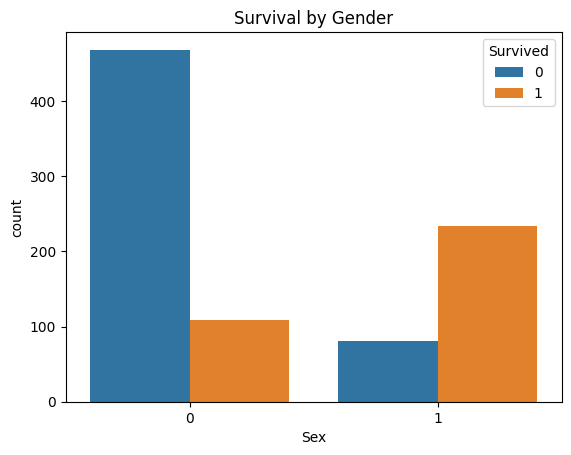

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=train)
plt.title("Survival Count")
plt.show()

sns.countplot(x='Sex', hue='Survived', data=train)
plt.title("Survival by Gender")
plt.show()


In [14]:
import pickle
pickle.dump(model, open("titanic_model.pkl", "wb"))
